# This notebool is meant for arbitrary tests 
Testing code, util functions, helper functions, project components, pipelines ....

In [1]:
#Change working directory to project direcgtory
import os

current_directory = os.getcwd()
project_name = 'bcppmchurn'
project_path = os.path.join(current_directory.split(project_name)[0], project_name)
os.chdir(project_path)
print(os.getcwd())  

/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
from scipy import stats
from pyspark.sql import SparkSession
from pyspark.sql import functions
import yaml 
import pickle 
import xgboost
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

from src.components.data_ingestion import get_feature_tables_from_impala, get_target_table 
from src.components.data_structuring import StructuringPipeline
from src.components.data_processing import HandlingMissingValues
from src.components.data_processing import run_training_data_processing_pipeline, run_inference_data_processing_pipeline
from src.eda import utils
from src.eda.utils import columnsFamilies

In [3]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"

### Test 

In [5]:
data_date = "2024-10-11"
df = pd.read_csv(f"{data_path}/{data_date}_final_df.csv", index_col=0, nrows=10000)

In [6]:
df.head()

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date,complaints_complaints_complaint_status_abondon_duration_nb_1m,complaints_complaints_complaint_status_abondon_total_nb_1m,complaints_complaints_complaint_status_autre_duration_nb_1m,complaints_complaints_complaint_status_autre_total_nb_1m,...,voice_call_direction_ic_duration_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_weekend_y_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,voice_workingh_y_duration_value_1_3w_3_4w
0,212602495129,Forfaits 49 dhs,non_churners,2024-02-25,2023-01-17 21:09:34,20240607,NaN,NaN,NaN,NaN,...,1.21109,2.562370,NaN,2.539916,2.484907,2.538944,3.490659,1.080202,2.095236,3.171898
1,212698494964,Forfaits 49 dhs,non_churners,2024-09-27,2024-04-21 14:21:56,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,212602646609,Forfaits 49 dhs,non_churners,2024-09-27,2024-05-09 13:08:12,20240607,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,212601341395,Forfaits 99 dhs,non_churners,2024-02-19,2022-10-03 18:50:24,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,212701119852,Forfaits 49 dhs,non_churners,2024-02-12,2020-10-31 12:59:13,20240607,NaN,NaN,NaN,NaN,...,NaN,-2.735131,NaN,-2.735131,-2.772589,-2.677018,-4.262680,0.000000,-3.097515,-2.581298


In [40]:
import importlib
from src.components import data_processing 
importlib.reload(data_processing)
from src.components.data_processing import run_training_data_processing_pipeline

In [41]:
batch_date = "2024-11-07"
x_train_norm, y_train, x_dev_norm, y_dev, x_test_norm, y_test  = run_training_data_processing_pipeline(df)

Creating churn target from churn segemnt....................................................... 
Train, dev and test Spliting .......................................................
df_train shape :(7000, 3582) .......................................................
df_dev shape: (2100, 3582) .......................................................
df_test shape: (900, 3582) .......................................................
Saving train dev and test sets
Selecting iter 1 features .......................................................
df_train shape: (7000, 537) .......................................................
df_dev shape: (2100, 537) .......................................................
df_test shape: (900, 537) .......................................................
Replacing 0 values with nan, in df_train, df_dev and df_test .......................................................
Are still there any 0 values in df_train after transforming 0 values into nan : False....

/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:228: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dev = df_dev.fillna(0)
/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:229: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.fillna(0)
/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:230: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated an

Total number of missing values in df_train after filling all nan with 0 is : 0...........................
Saving train dev and test sets
df_train.......................................................
Encoding gamme feature .......................................................
df_dev .......................................................
Encoding gamme feature .......................................................
df_test.......................................................
Encoding gamme feature .......................................................
Splitting data to x and y.......................................................
x_train shape is: (7000, 531).......................................................
x_dev shape is: (2100, 531).......................................................
x_test shape is: (900, 531).......................................................
Saving y_train.......................................................
Saving y_dev......................

/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = df.rename(columns={"gamme": "gamme_encoded"})
/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = df.rename(columns={"gamme": "gamme_encoded"})
/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:254: PerformanceWarni

Saving x_dev_norm.......................................................
Saving x_test_norm.......................................................


In [14]:
df_norms, dns = run_inference_data_processing_pipeline(df, batch_date="01-01-2001")

Extracting dns list from df .......................................................
Selecting inference featrues from df .......................................................
Filling nan values with 0 .......................................................
Total number of missing values in df_train after filling all nan with 0 is : 0
Encoding gamme feature .......................................................
Normalizing data .......................................................
Saving inference data with dns .......................................................


In [45]:
df_norms.shape

(10000, 531)

In [83]:
importlib.reload(training_pipeline)
from src.eda import utils 
from src.pipelines.training_pipeline import TrainingPipeline

Loading training data = x_train_norm, y_train, x_dev_norm, y_dev, x_test_norm, y_test ...............................................
------------------
x_train shape : (10000, 531)
y_train shape : (10000, 1)
------------------
x_dev shape : (10000, 531)
y_dev shape : (10000, 1)
------------------
x_test shape : (5839, 531)
y_test shape : (5839, 1)
Transforming DataFrames to DMatrix ...............................................
Training xgboost model ...............................................
[0]	train-logloss:0.68804	dev-logloss:0.68819
[1]	train-logloss:0.68309	dev-logloss:0.68334
[2]	train-logloss:0.67822	dev-logloss:0.67857
[3]	train-logloss:0.67342	dev-logloss:0.67388
[4]	train-logloss:0.66870	dev-logloss:0.66924
[5]	train-logloss:0.66406	dev-logloss:0.66471
[6]	train-logloss:0.65952	dev-logloss:0.66028
[7]	train-logloss:0.65506	dev-logloss:0.65591
[8]	train-logloss:0.65064	dev-logloss:0.65159
[9]	train-logloss:0.64629	dev-logloss:0.64731
[10]	train-logloss:0.64207	dev-logl

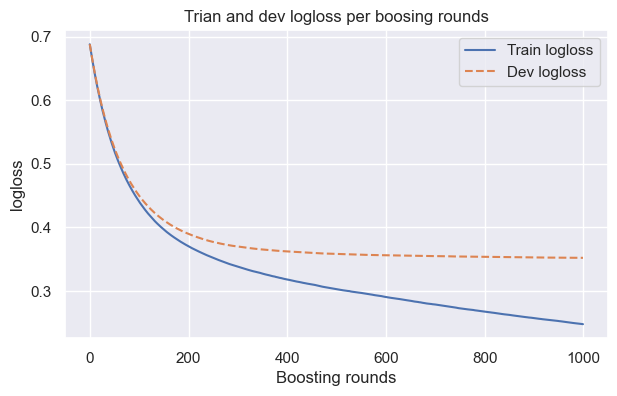

Computing predictions on test data for evaluation...............................................
Reporting model performance ...............................................
                  train set      ||     test set
------------------------------------------------------------
xgboost accuracy    : 0.9162  ||  0.8491179996574756
xgboost precision   : 0.9190428713858425  ||  0.8602451838879159
xgboost recall      : 0.9143027177147391  ||  0.8359428182437032
xgboost f1 score    : 0.9166666666666666  ||  0.8479199033316072
-------------------------------------------------------------


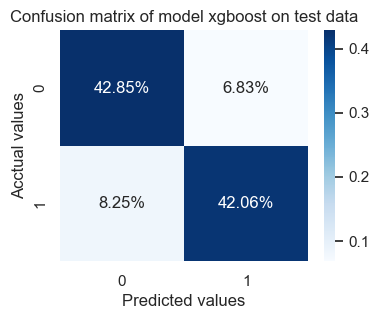

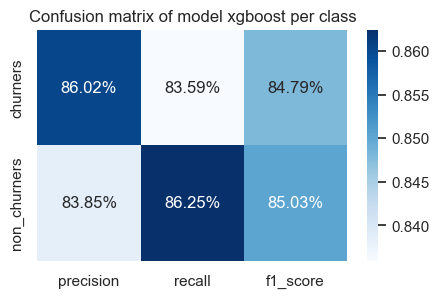

Plot roc curve


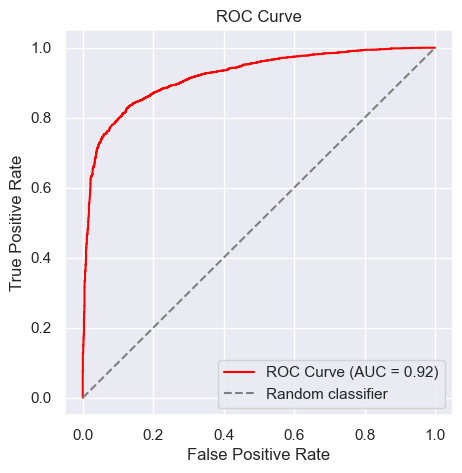

Plot calibration curve to evaluate model calibration


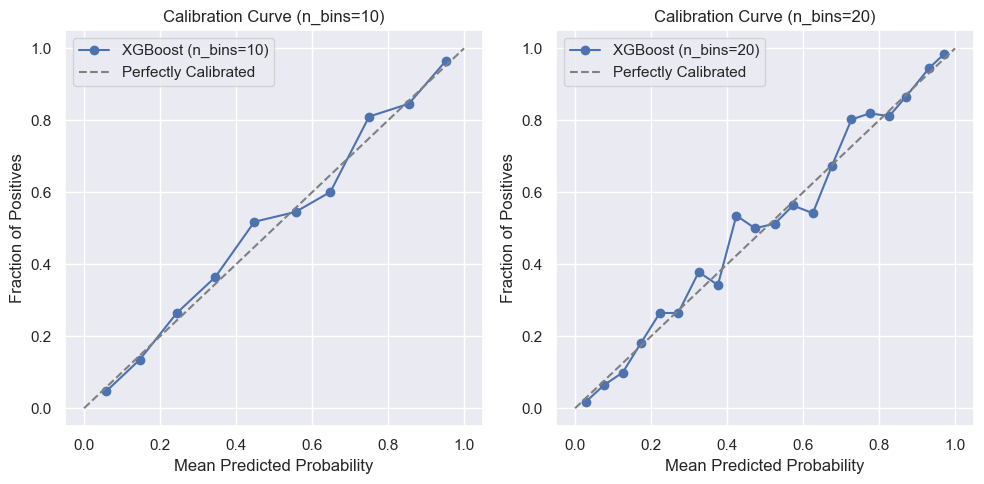

Get feature importance from model
Plot number of correctly predicted scores and wrong ones


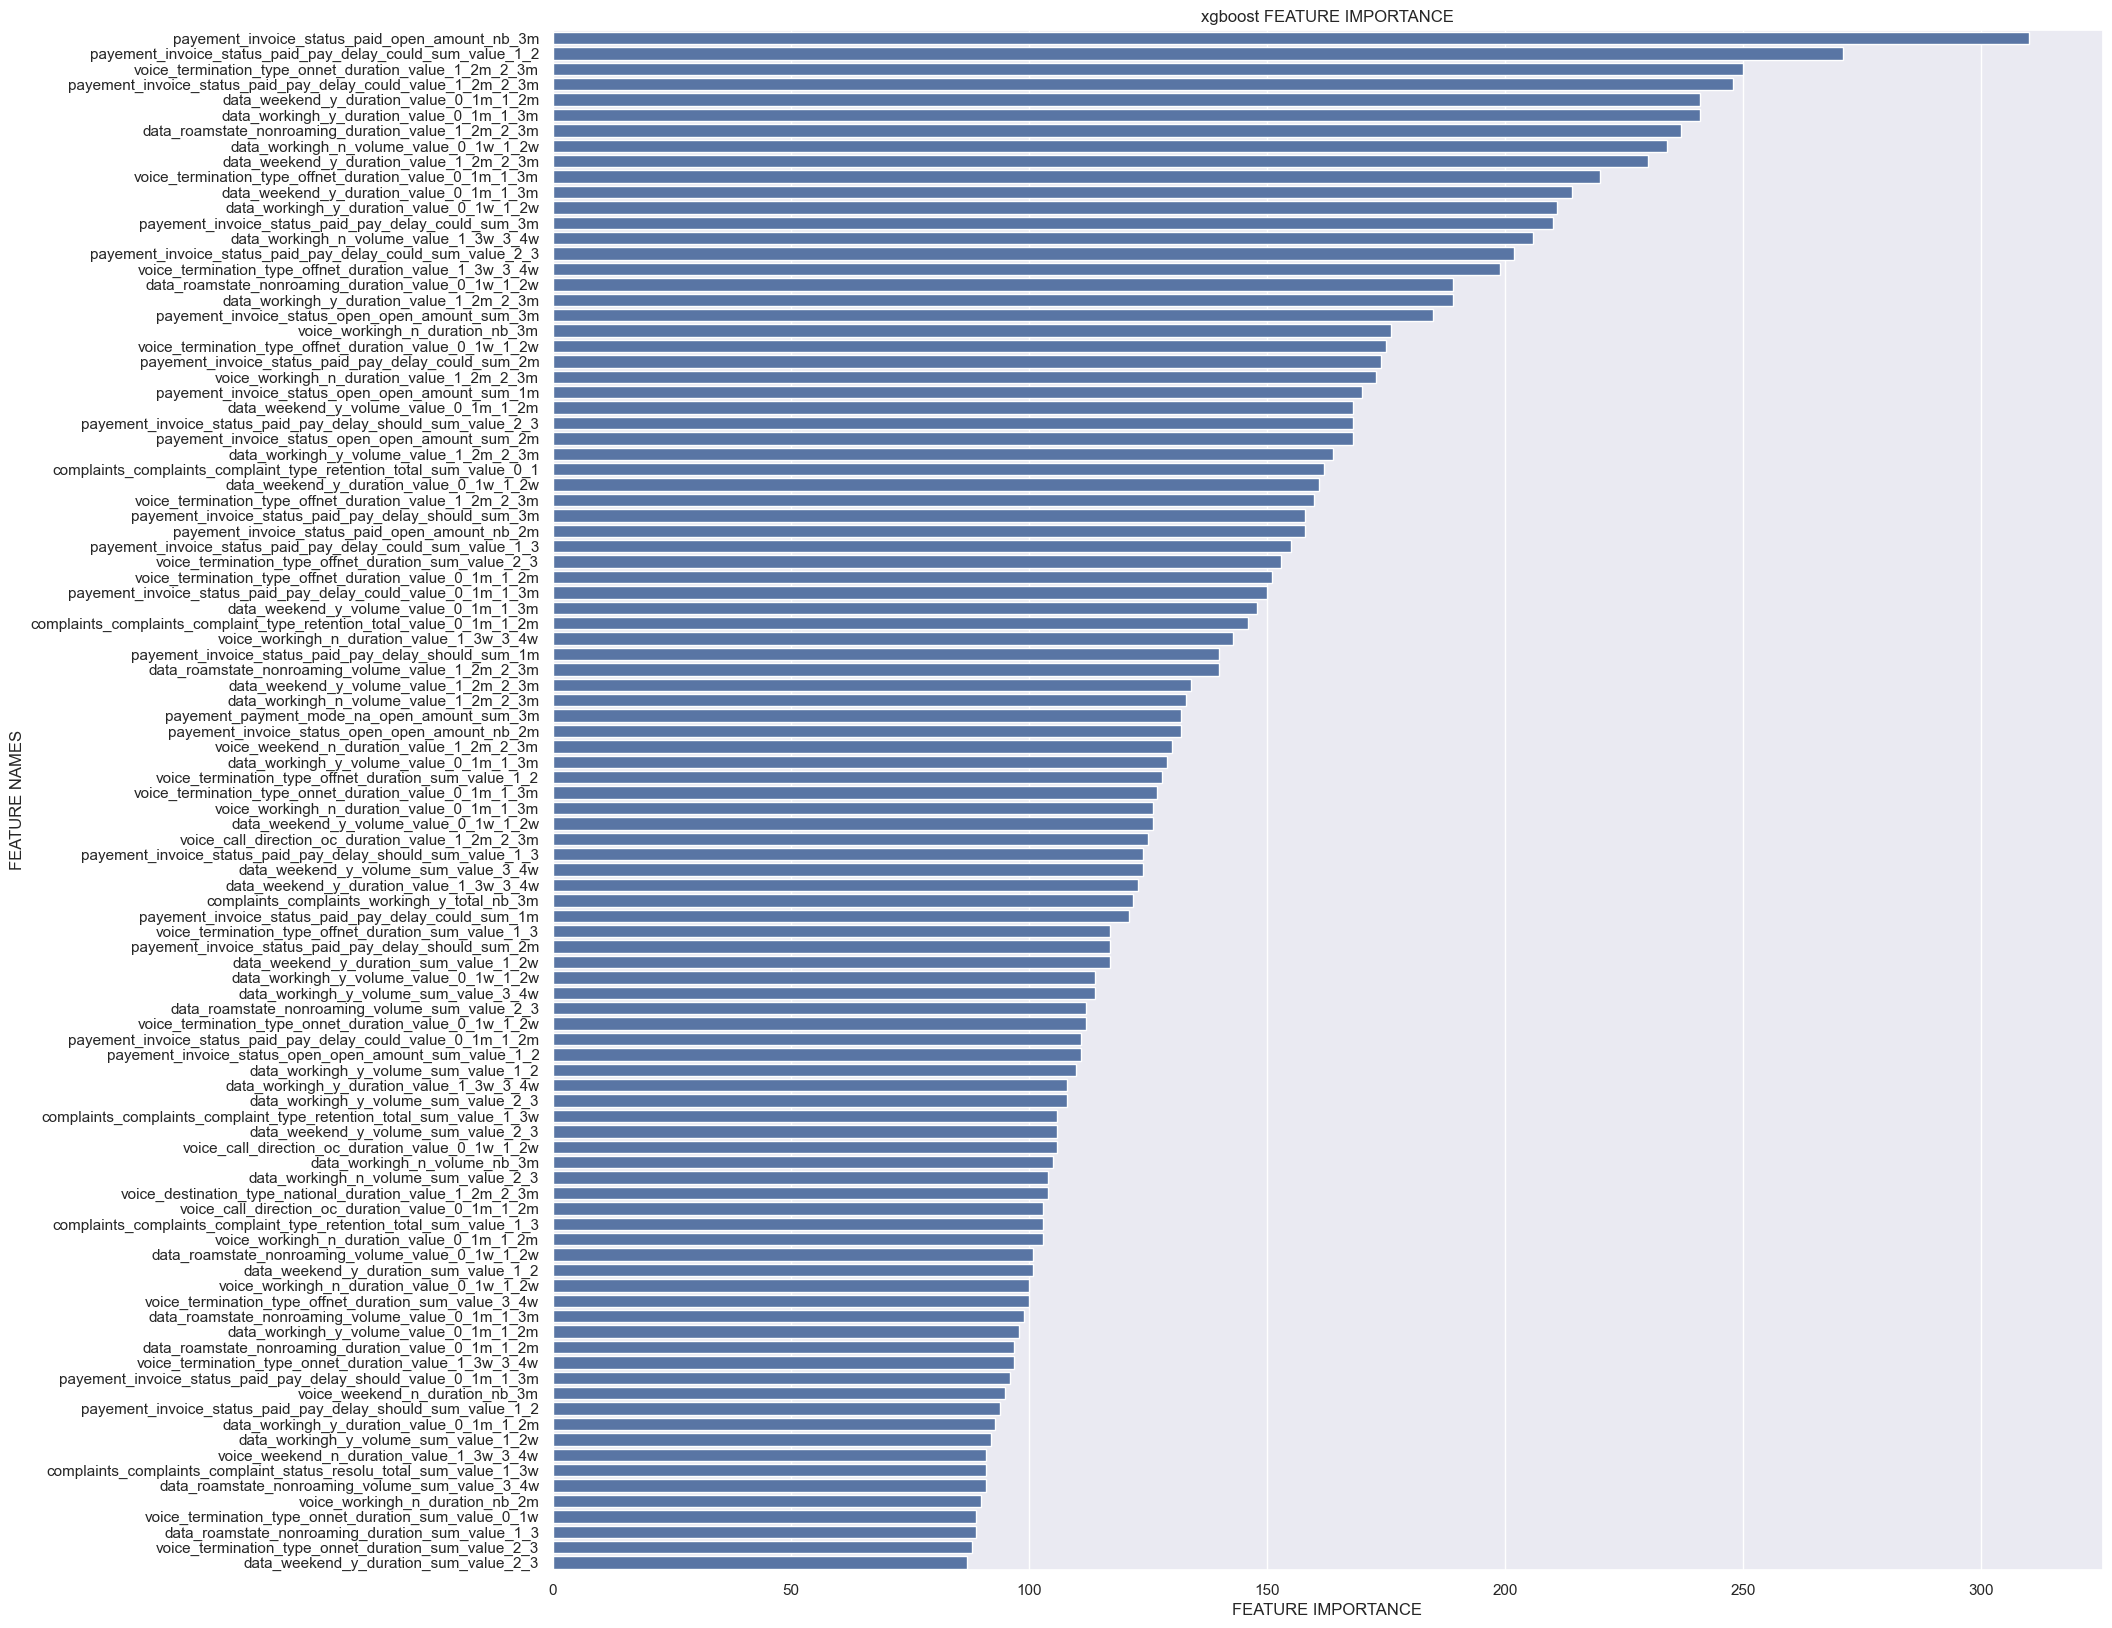

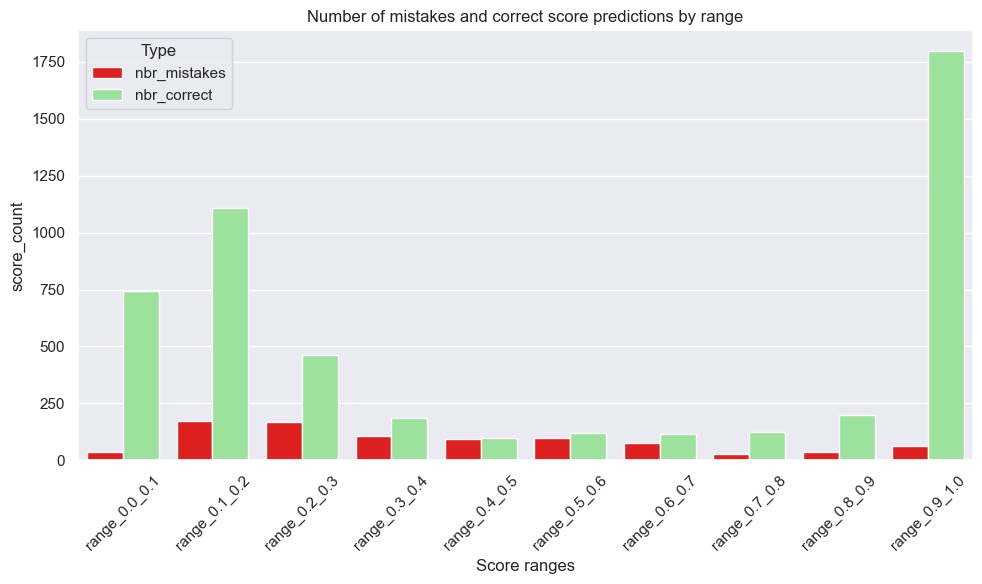

Plot data distribution of acctual and predicted target with tsne
Applying tsne on data
Ploting data distribution


/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/eda/utils.py:411: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data = data_tsne, x="x1", y="x2", hue = "churn", ax=axes[0], palette=["lightgreen", "red"])


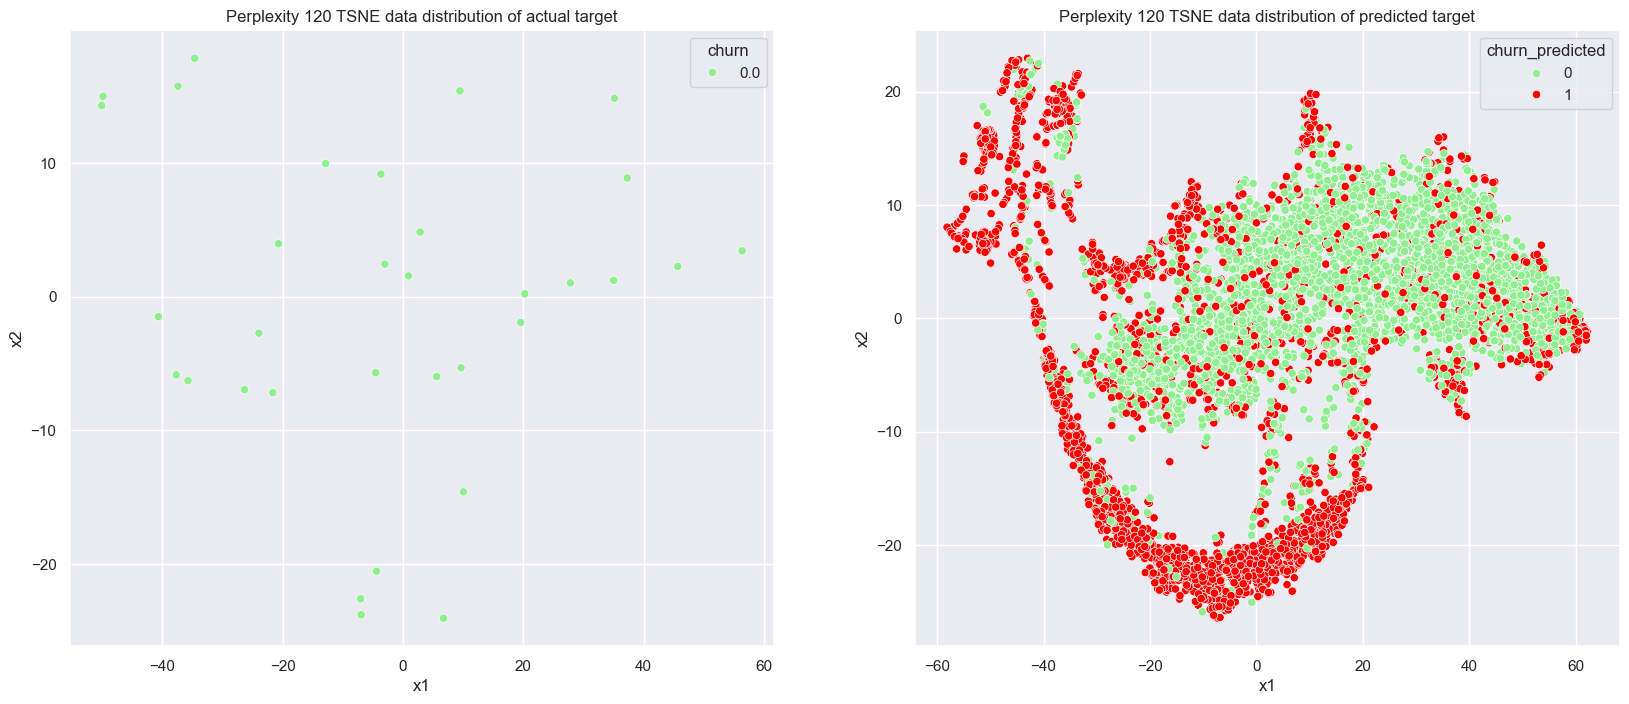

Precision recall curve for choosing the best thereshold


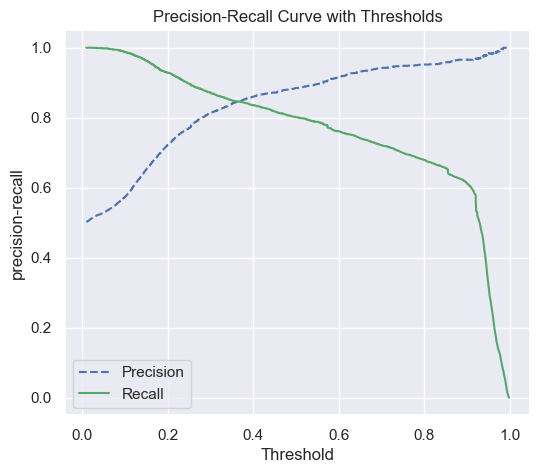

In [84]:
data_date = "2024-10-22"
test_model = TrainingPipeline().run_training_pipeline(data_date, num_boosting_rounds=1000, early_stopping_rounds=30, eval_metric="logloss", THRESHOLD = 0.4)

### Test 2

In [7]:
#Load data instead
df = pd.read_csv("data/experiments_data/2024-11-01_final_df.csv", index_col=0)
df.head()

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date,complaints_complaints_complaint_status_abondon_duration_nb_1m,complaints_complaints_complaint_status_abondon_total_nb_1m,complaints_complaints_complaint_status_autre_duration_nb_1m,complaints_complaints_complaint_status_autre_total_nb_1m,...,voice_call_direction_ic_duration_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_weekend_y_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,voice_workingh_y_duration_value_1_3w_3_4w
16,212603971703,Forfaits 49 dhs,non_churners,2024-11-01,2019-12-05 17:05:26,20241101,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,212707542311,Forfaits 49 dhs,non_churners,2024-11-01,2021-10-22 09:54:26,20241101,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,212608768406,Forfaits 49 dhs,non_churners,2024-11-01,2021-06-28 12:32:22,20241101,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,212615364402,Forfaits Hors 99 dhs,non_churners,2024-11-01,2019-08-20 21:38:23,20241101,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,212702254606,Forfaits Hors 99 dhs,non_churners,2024-11-01,2022-02-25 19:40:55,20241101,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print (df.columns)

Index(['dn', 'gamme', 'churn_segment', 'churn_date', 'activation_bscs_date',
       'id_date',
       'complaints_complaints_complaint_status_abondon_duration_nb_1m',
       'complaints_complaints_complaint_status_abondon_total_nb_1m',
       'complaints_complaints_complaint_status_autre_duration_nb_1m',
       'complaints_complaints_complaint_status_autre_total_nb_1m',
       ...
       'voice_call_direction_ic_duration_value_1_3w_3_4w',
       'voice_call_direction_oc_duration_value_1_3w_3_4w',
       'voice_destination_type_international_duration_value_1_3w_3_4w',
       'voice_destination_type_national_duration_value_1_3w_3_4w',
       'voice_termination_type_offnet_duration_value_1_3w_3_4w',
       'voice_termination_type_onnet_duration_value_1_3w_3_4w',
       'voice_weekend_n_duration_value_1_3w_3_4w',
       'voice_weekend_y_duration_value_1_3w_3_4w',
       'voice_workingh_n_duration_value_1_3w_3_4w',
       'voice_workingh_y_duration_value_1_3w_3_4w'],
      dtype='object', l

In [9]:
mdns = df[df.columns[:6]]
mdns.head()

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date
16,212603971703,Forfaits 49 dhs,non_churners,2024-11-01,2019-12-05 17:05:26,20241101
17,212707542311,Forfaits 49 dhs,non_churners,2024-11-01,2021-10-22 09:54:26,20241101
19,212608768406,Forfaits 49 dhs,non_churners,2024-11-01,2021-06-28 12:32:22,20241101
20,212615364402,Forfaits Hors 99 dhs,non_churners,2024-11-01,2019-08-20 21:38:23,20241101
37,212702254606,Forfaits Hors 99 dhs,non_churners,2024-11-01,2022-02-25 19:40:55,20241101


In [12]:
list_of_mistaken_mdns = [212600621501, 212600613313, 212600618007, 212600622404, 212600605207, 212600626113, 212600615604, 212600609606, 212600606003, 212600612001, 212600624202, 212600623802, 212600628808]
mdns[mdns["dn"].isin(list_of_mistaken_mdns)]

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date
99973,212600628808,Forfaits 99 dhs,non_churners,2024-11-01,2022-03-11 19:26:00,20241101
284106,212600623802,Forfaits 49 dhs,non_churners,2024-11-01,2022-04-20 18:30:35,20241101
294502,212600606003,Forfaits 99 dhs,non_churners,2024-11-01,2022-03-02 14:52:06,20241101
364159,212600626113,Forfaits Hors 99 dhs,non_churners,2024-11-01,2021-05-05 16:12:49,20241101
395354,212600612001,Forfaits 49 dhs,non_churners,2024-11-01,2022-02-28 10:49:25,20241101
397412,212600615604,Forfaits 49 dhs,non_churners,2024-11-01,2022-04-28 12:32:01,20241101
593964,212600621501,Forfaits 49 dhs,non_churners,2024-11-01,2022-04-05 17:52:36,20241101
846059,212600605207,Forfaits 49 dhs,non_churners,2024-11-01,2022-04-29 11:10:19,20241101
846501,212600624202,Forfaits 49 dhs,non_churners,2024-11-01,2022-03-01 15:32:17,20241101
917856,212600622404,Forfaits Hors 99 dhs,non_churners,2024-11-01,2022-03-23 18:54:07,20241101
